In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import gaussian_filter
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [20]:
def stokes_psi(Q, U):
    """
    Returns the psi angular map derived from the 
    Stokes parameter Q and U
    
    @type Q: numpy array
    @type U: numpy array
    """
    return np.arctan2(U, Q)/2


def Imshow(array, title='',**kwargs):
    """
    Displays and Image data using matplotlib.
    
    @type array: numpy array
    """
    plt.figure(figsize = (7, 7))
    plt.title(title)
    plt.imshow(array)
    plt.colorbar()
    plt.show()
    
def Histshow(array, title='', **kwargs):
    """
    Show a histogram of the corresponding data array.
    
    @type array: numpy array
    @type title: String
    """
    plt.figure()
    plt.title(title)
    plt.hist(array, bins = 100)
    plt.show()
    
def get_basic_stats(array):
    """
    Prints some basic statistics about the data array.
    
    @type array: Numpy array
    @rtype: List[Floats]
    """
    mean, median, std = np.mean(array), np.median(array), np.std(array)
    return [mean, median, std]

def Imsave(array, title, loc=''):
    """
    Saves the newly generated fits file into the desired 
    location. Default is current working directory.
    
    @type array: Numpy array
    @type title: String
    @type loc: String
    @rtype: None
    """
    hdu = fits.PrimaryHDU(array)
    hdulist = fits.HDUList([hdu])
    if len(loc) > 0:
        try:
            os.chdir(loc)
        except:
            print("Invalid location")
    fits.writeto(title, array, overwrite=True)
        
def Gaussian_smoothing(Q, U, box_size=10, beam_size=0.65, save=True):
    """
    Applies Gaussian Smoothing then downsamples the data.
    
    Default is set to BLAST-TNG parameters.
    
    DS stands for down sampling. If the value of ds is greater than 0, then
    we save a downsampled image.
    
    @type Q: Stokes Q Map (1d Array)
    @type U: Stokes U Map (1d Array)
    @type box_size: integer
    @type beam_size: float
    @rtype: None
    """
    
    # Pixel size is 0.02 pc
    #
    array_shape = np.shape(Q)[0]
    pixel_size = box_size / array_shape
    smoothing_length = beam_size / pixel_size
    
    
    Smoothed_Q = gaussian_filter(Q, sigma=smoothing_length / 2.35) # fwhm
    Smoothed_U = gaussian_filter(U, sigma=smoothing_length / 2.35) # fwhm
    
    Smoothed_PSI = stokes_psi(Smoothed_Q, Smoothed_U)
    
    if save:
        
        ttl = 'L10_' + str(beam_size) + '.fits'
        Imsave(array=Smoothed_PSI, title=ttl)
    return Smoothed_PSI


def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

In [21]:
# Load Some Data
L1M10_Q = fits.open("athena/L10_Q.fits")[0].data
L1M10_U = fits.open("athena/L10_U.fits")[0].data

# Imshow(L1M10_Q)
# Imshow(L1M10_U)

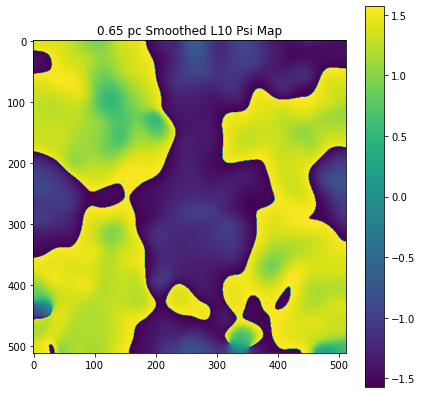

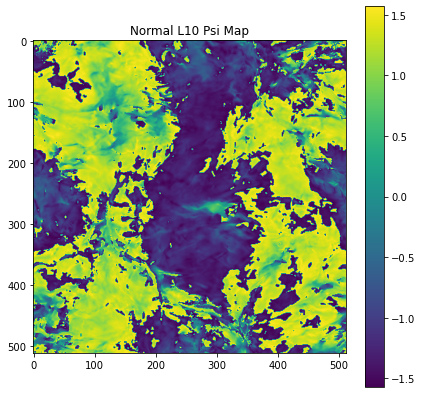

In [22]:
Smoothed_PSI = Gaussian_smoothing(L1M10_Q, L1M10_U, box_size=10, beam_size=0.65)

Imshow(Smoothed_PSI, title="0.65 pc Smoothed L10 Psi Map")
L1M10_psi = stokes_psi(L1M10_Q, L1M10_U)
Imshow(L1M10_psi, title='Normal L10 Psi Map')

Smoothing Configurations

In [20]:
# Get Image size

simulation_box_size = 10 # parsecs
x_length = np.shape(L1M10_Q)[0]

pixel_size = simulation_box_size / x_length

beam_size = 0.65 / pixel_size #Our desired smoothing length
print(beam_size)
print(pixel_size)
print(beam_size/2.35)

10/0.65

33.28
0.01953125
14.161702127659574


15.384615384615383

<h3>Smoothing to high standard deviation gets rid of sharp edges as desired</h3>


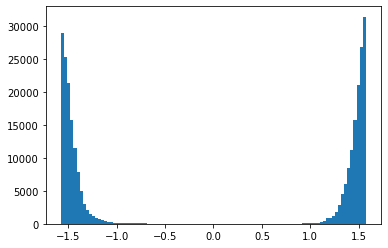

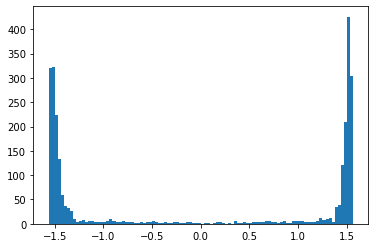

In [19]:
og = L1M10_psi
Histshow(og.flatten())

# Smoothed
Histshow(Smoothed_PSI.flatten())

In [22]:
print("Original stats")
print("Mean, Median, Standard Deviation: ", get_basic_stats(L1M10_psi.flatten()))

print("\nSmoothed Stats")
print("Mean, Median, Standard Deviation: ", get_basic_stats(Smoothed_PSI.flatten()))

Original stats
Mean, Median, Standard Deviation:  [0.03816259593938268, 1.2176504781878341, 1.4700798445040812]

Smoothed Stats
Mean, Median, Standard Deviation:  [0.003771878672928343, -0.046816488385004955, 1.4427134678131142]


Save the Image here.

In [13]:
Imsave(array=Smoothed_L1M10_psi, title='L1M10_065.fits')

Show that we saved the smoothed image correctly.

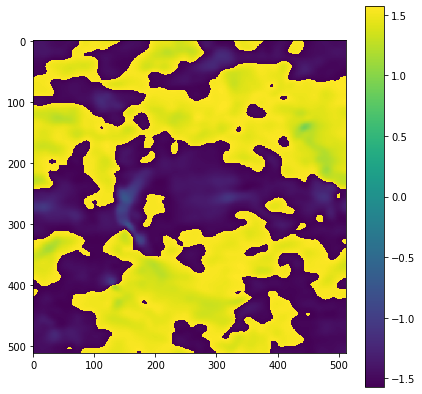

In [66]:
test = fits.open("L1M10_0.1.fits")[0].data
Imshow(test)